# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
y=data['MEDV']

In [5]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
X=data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [8]:
linear=LinearRegression()

In [9]:
linear.fit(X_train,y_train)

LinearRegression()

In [10]:
linear.score(X_test,y_test)

0.7479443932758143

In [11]:
y_train.shape

(404,)

## 3. Calculate and print R-squared for both the training and the testing set.

In [12]:
y_pred=linear.predict(X_test)

In [13]:
y_pred.shape

(102,)

In [14]:
y_pred_train=linear.predict(X_train)

In [15]:
r2_score(y_train,y_pred_train)

0.7362135393705567

In [16]:
r2_score(y_test,y_pred)

0.7479443932758143

## 4. Calculate and print mean squared error for both the training and the testing set.

In [17]:
mean_squared_error(y_train,y_pred_train)

22.337589600977704

In [18]:
mean_squared_error(y_test,y_pred)

20.757949852617585

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [19]:
mean_absolute_error(y_train,y_pred_train)

3.2602229874934636

In [20]:
mean_absolute_error(y_test,y_pred)

3.394467567282507

## Classification Model Evaluation

In [21]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [22]:
y=data['class']

In [23]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

In [43]:
X=data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [44]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X, y, test_size=0.2)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [45]:
logistic=LogisticRegression(solver="lbfgs")

In [46]:
logistic.fit(X_train_iris,y_train_iris)

LogisticRegression()

In [47]:
y_pred_iris1=logistic.predict(X_train_iris)

In [48]:
y_pred_iris2=logistic.predict(X_test_iris)

In [49]:
y_pred_iris1.shape

(120,)

In [50]:
y_train_iris

23     0
141    2
108    2
54     1
65     1
      ..
6      0
69     1
19     0
42     0
37     0
Name: class, Length: 120, dtype: int64

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [51]:
accuracy_score(y_train_iris,y_pred_iris1)

0.975

In [52]:
accuracy_score(y_test_iris,y_pred_iris2)

0.9333333333333333

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [53]:
balanced_accuracy_score(y_train_iris,y_pred_iris1)

0.9743589743589743

In [54]:
balanced_accuracy_score(y_test_iris,y_pred_iris2)

0.9393939393939394

## 10. Calculate and print the precision score for both the training and the testing set.

In [57]:
precision_score(y_train_iris,y_pred_iris1, average='macro')

0.9745614035087721

In [58]:
precision_score(y_test_iris,y_pred_iris2,average='macro')

0.9393939393939394

## 11. Calculate and print the recall score for both the training and the testing set.

In [61]:
recall_score(y_train_iris,y_pred_iris1,average='macro')

0.9743589743589743

In [62]:
recall_score(y_test_iris,y_pred_iris2,average='macro')

0.9393939393939394

## 12. Calculate and print the F1 score for both the training and the testing set.

In [64]:
f1_score(y_train_iris,y_pred_iris1,average='macro')

0.9743547591648859

In [65]:
f1_score(y_test_iris,y_pred_iris2,average='macro')

0.9393939393939394

## 13. Generate confusion matrices for both the training and the testing set.

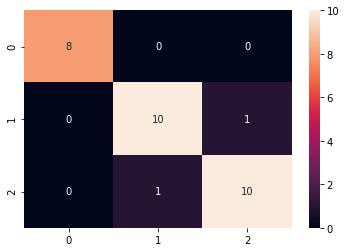

In [69]:
cm = confusion_matrix(y_test_iris,y_pred_iris2)
sns.heatmap(cm,annot=True)

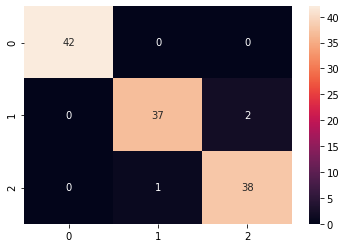

In [73]:
cm = confusion_matrix(y_train_iris,y_pred_iris1)
sns.heatmap(cm,annot=True)

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

models = {
    "svm-linear": CalibratedClassifierCV(LinearSVC(),cv=3),
    "svm-rbf": CalibratedClassifierCV(SVC(kernel="sigmoid",gamma="auto"),cv=3),
    "randomforest": RandomForestClassifier(n_estimators=100),
}

# Train all the models in the models dict
for name,m  in models.items():
    print(f"Training {name}...")
    m.fit(X_train_iris, y_train_iris)
print("Train complete")

Training svm-linear...
Training svm-rbf...
Training randomforest...
Train complete


/home/silviaherf/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/silviaherf/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/silviaherf/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [82]:
printMetric = lambda label,value:print(f"\t {label}: {round(value,3)}")

for name, model in models.items():
    y_pred = model.predict(X_test_iris)
    print(f"Evaluating model {name}")
    printMetric("Accuracy",accuracy_score(y_test_iris, y_pred_iris2))
    printMetric("Precision",precision_score(y_test_iris, y_pred_iris2,average='macro'))
    printMetric("Recall",recall_score(y_test_iris, y_pred_iris2,average='macro'))
    printMetric("F1Score",f1_score(y_test_iris, y_pred_iris2,average='macro'))

print("Train complete")

Evaluating model svm-linear
	 Accuracy: 0.933
	 Precision: 0.939
	 Recall: 0.939
	 F1Score: 0.939
Evaluating model svm-rbf
	 Accuracy: 0.933
	 Precision: 0.939
	 Recall: 0.939
	 F1Score: 0.939
Evaluating model randomforest
	 Accuracy: 0.933
	 Precision: 0.939
	 Recall: 0.939
	 F1Score: 0.939
Train complete
